# Word Embeddings
## Setup

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


#set_config(transform_output='pandas')

## Load model

In [39]:
def load_glove_embeddings(filepath):
    embeddings = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = list(map(float, values[1:]))
            embeddings[word] = vector
        return embeddings
    
embeddings = load_glove_embeddings('data/glove.6B.100d.txt')

In [40]:
# choosing a bunch of words to test the relationship
words = ['king', 'queen', 'man', 'woman', 'cat', 'dog', 'dinosaur','car','lizard','robot','computer','capybara']
vectors = [embeddings[word] for word in words]

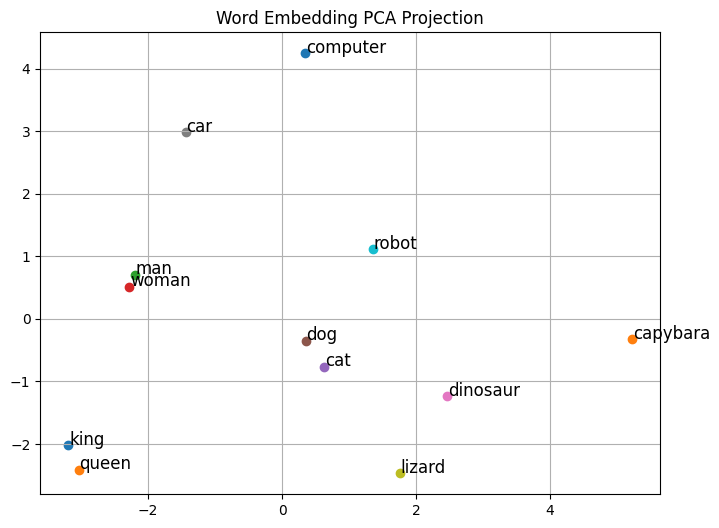

In [41]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Word Embedding PCA Projection")
plt.grid(True)
plt.show()

### Finding analogies

In [42]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def find_analogy(a, b, c, embeddings):
    vec = np.array(embeddings[b]) - np.array(embeddings[a]) + np.array(embeddings[c])
    similarities = {word: cosine_similarity(vec, np.array(vec2)) 
                    for word, vec2 in embeddings.items() if word not in [a, b, c]}
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:5]

In [43]:
# examples (A - B + C = ?): 'milkshake' - 'milk' + 'strawberry'
print(find_analogy('football', 'messi', 'cristiano', embeddings))

[('pato', np.float64(0.7029509009260932)), ('higuain', np.float64(0.6652732856313205)), ('ronaldinho', np.float64(0.6542400725263077)), ('nani', np.float64(0.6539645657838549)), ('rivaldo', np.float64(0.6515930047700295))]
